# The main task is answer a question which data (columns) have the most impact on decision if the client will subscribe a term deposit.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
traindata = pd.read_csv('bank-full.csv', index_col = False)
testdata = pd.read_csv('bank.csv', index_col = False)

In [27]:
traindata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [28]:
testdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Changing some columns name into more understanding expressions

In [29]:
new_columns_name = {"default": "default_credit",
                   "day": "contact-dayofmonth",
                   "month": "contact-month",
                   "duration": "contact-duration",
                   "pdays": "past_days_call",
                   "previous": "contacts_before_campaign",
                   "poutcome": "outcome_previous_campaign",
                   "y": "term_deposit"}

traindata = traindata.rename(columns = new_columns_name)
testdata = testdata.rename(columns = new_columns_name)

### Checking for any inproper or missing data

In [30]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45211 non-null  int64 
 1   job                        45211 non-null  object
 2   marital                    45211 non-null  object
 3   education                  45211 non-null  object
 4   default_credit             45211 non-null  object
 5   balance                    45211 non-null  int64 
 6   housing                    45211 non-null  object
 7   loan                       45211 non-null  object
 8   contact                    45211 non-null  object
 9   contact-dayofmonth         45211 non-null  int64 
 10  contact-month              45211 non-null  object
 11  contact-duration           45211 non-null  int64 
 12  campaign                   45211 non-null  int64 
 13  past_days_call             45211 non-null  int64 
 14  contac

In [31]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        4521 non-null   int64 
 1   job                        4521 non-null   object
 2   marital                    4521 non-null   object
 3   education                  4521 non-null   object
 4   default_credit             4521 non-null   object
 5   balance                    4521 non-null   int64 
 6   housing                    4521 non-null   object
 7   loan                       4521 non-null   object
 8   contact                    4521 non-null   object
 9   contact-dayofmonth         4521 non-null   int64 
 10  contact-month              4521 non-null   object
 11  contact-duration           4521 non-null   int64 
 12  campaign                   4521 non-null   int64 
 13  past_days_call             4521 non-null   int64 
 14  contacts

### There is no need to change a structure/values of the tables (all values are corrected type and there are no missed data)

---

# **Statistic info**

## Compare basic stats in both datasets (training and testing).

In [32]:
traindata.describe()

,age,balance,contact-dayofmonth,contact-duration,campaign,past_days_call,contacts_before_campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [33]:
testdata.describe()

,age,balance,contact-dayofmonth,contact-duration,campaign,past_days_call,contacts_before_campaign
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Very good representation training data by testing data (their most important statistics parameters: **mean**, **std**, **median** have similar values).

---

## Looking for ***Pearson*** and ***Spearman correlation***

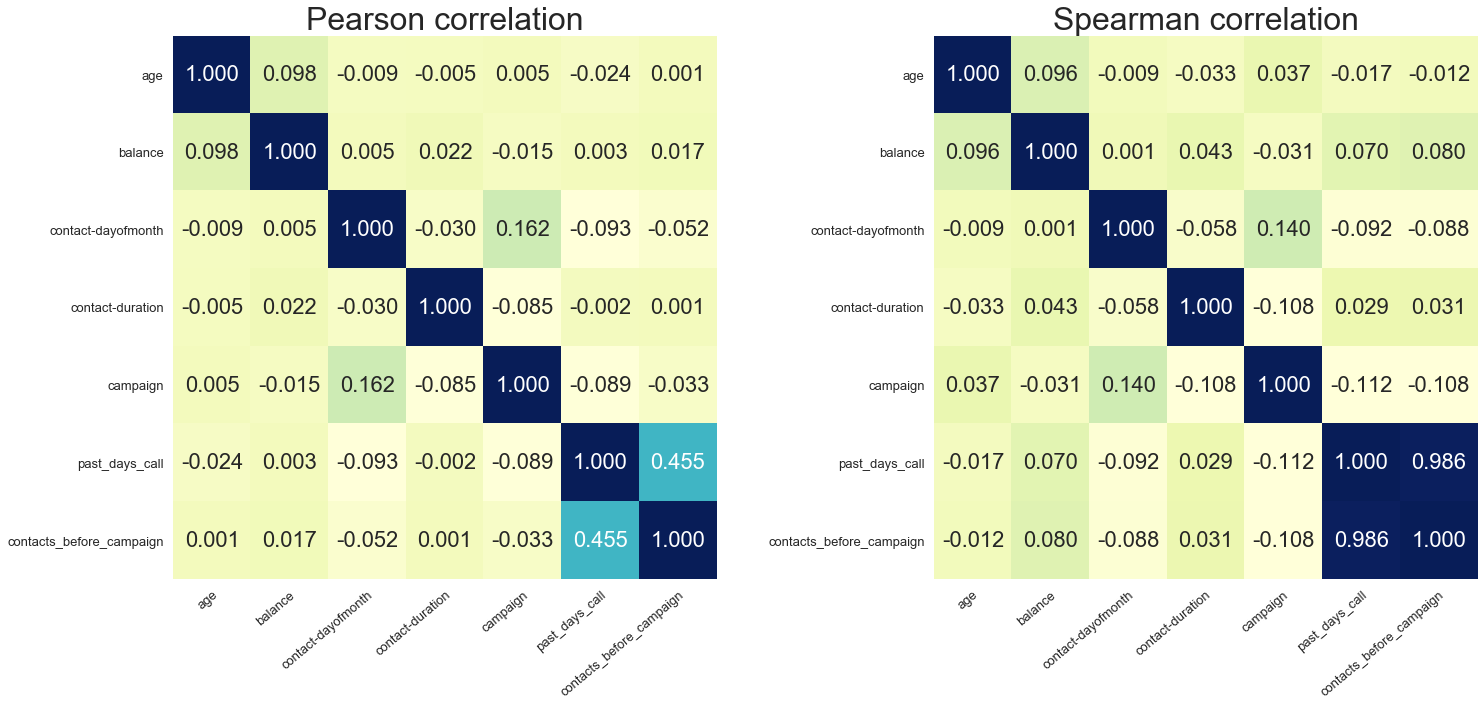

In [34]:
sns.set()

# Draw a heatmap with the numeric values in each cell
fig = plt.figure(figsize=(25, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax_ = [ax1, ax2]

correlation_data = [traindata.corr(method = 'pearson'), traindata.corr(method = 'spearman')]
titles_array = ['Pearson correlation', 'Spearman correlation']

# We use axs parameter to tell seaborn which subplot to use for this plot
for axs, data, titles in zip(ax_, correlation_data, titles_array):
    sns.heatmap(data = data, fmt = '.3f', square = True, cbar=False, cmap = "YlGnBu", annot = True, annot_kws = {"fontsize": 22}, ax = axs)
    axs.set_xticklabels(ax1.get_xticklabels(), rotation = 40, ha = "right", rotation_mode = "anchor", fontsize = 13)
    axs.set_yticklabels(ax1.get_xticklabels(), rotation = 0, ha = "right", rotation_mode = "anchor", fontsize = 13)
    axs.set_title(titles, fontsize = 32)

plt.show()

### High correlation between `contacts_before_campaign` and `past_days_call` (linear and non-linear) will be checking in plot - there is a chance to remove one of these features which will made future calculations much easier.

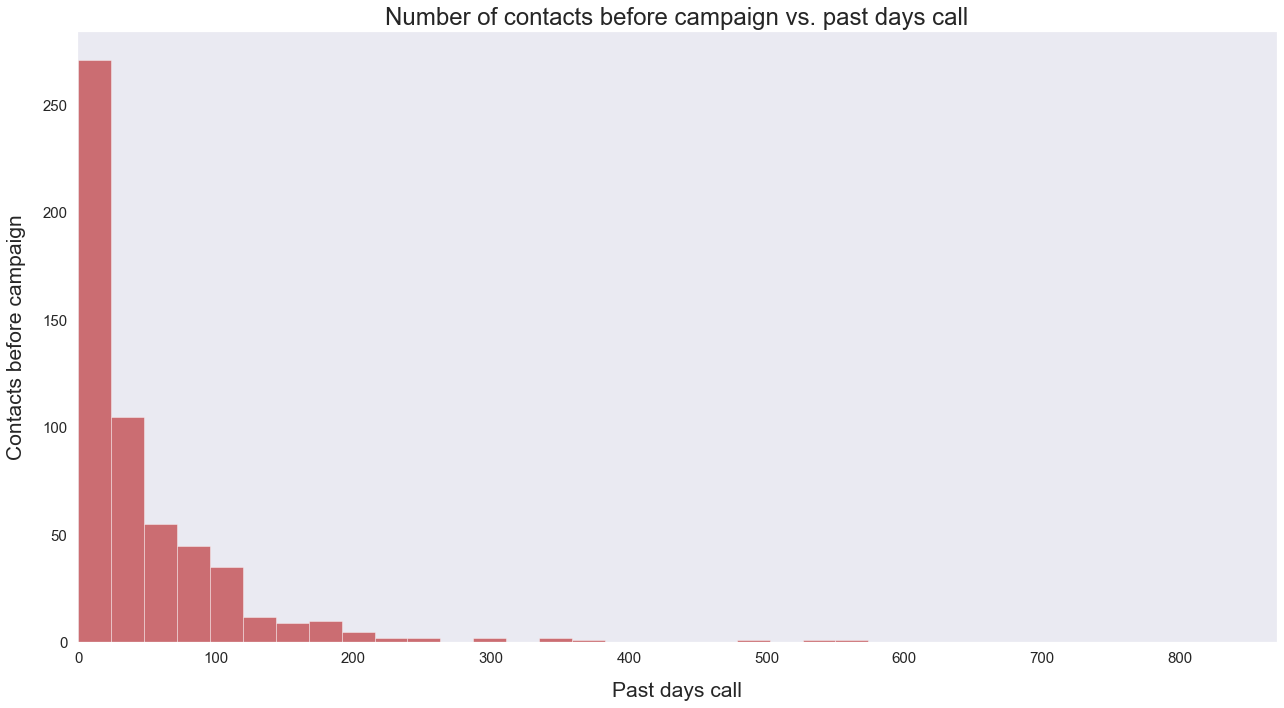

In [41]:
sum1 = traindata.groupby('past_days_call')['contacts_before_campaign'].sum()
x_num = np.math.ceil(np.sqrt(len(sum1)))

sns.set_style("dark")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (18, 10))

# Plot a histogram and kernel density estimate
sns.distplot(sum1, kde=False, hist_kws={"linewidth": 0.5, "alpha": 0.8}, bins = x_num, color="r")
plt.xlim(traindata['past_days_call'].min(), traindata['past_days_call'].max())
plt.xlabel('Past days call', labelpad = 16, fontsize = 21)
plt.ylabel('Contacts before campaign', labelpad = 16, fontsize = 21)
plt.title('Number of contacts before campaign vs. past days call', fontsize = 24)
ax.tick_params(labelsize = 15)

plt.tight_layout()

### Looking at the histogram shape we can agree that dependancy between these 2 variables is very high - it may be some of f=A*(1/x) function (where A > 0). 
### One of these columns is useless, but there is no clear way to find out which of them it should be deleted from the data.

### I decide to remove `'past_days_call'` from both tables.

In [42]:
traindata = traindata.drop('past_days_call', axis=1)
testdata = testdata.drop('past_days_call', axis=1)

***

## Visual representation of dependancies between numerical data columns and target class (`'term_deposit'`)

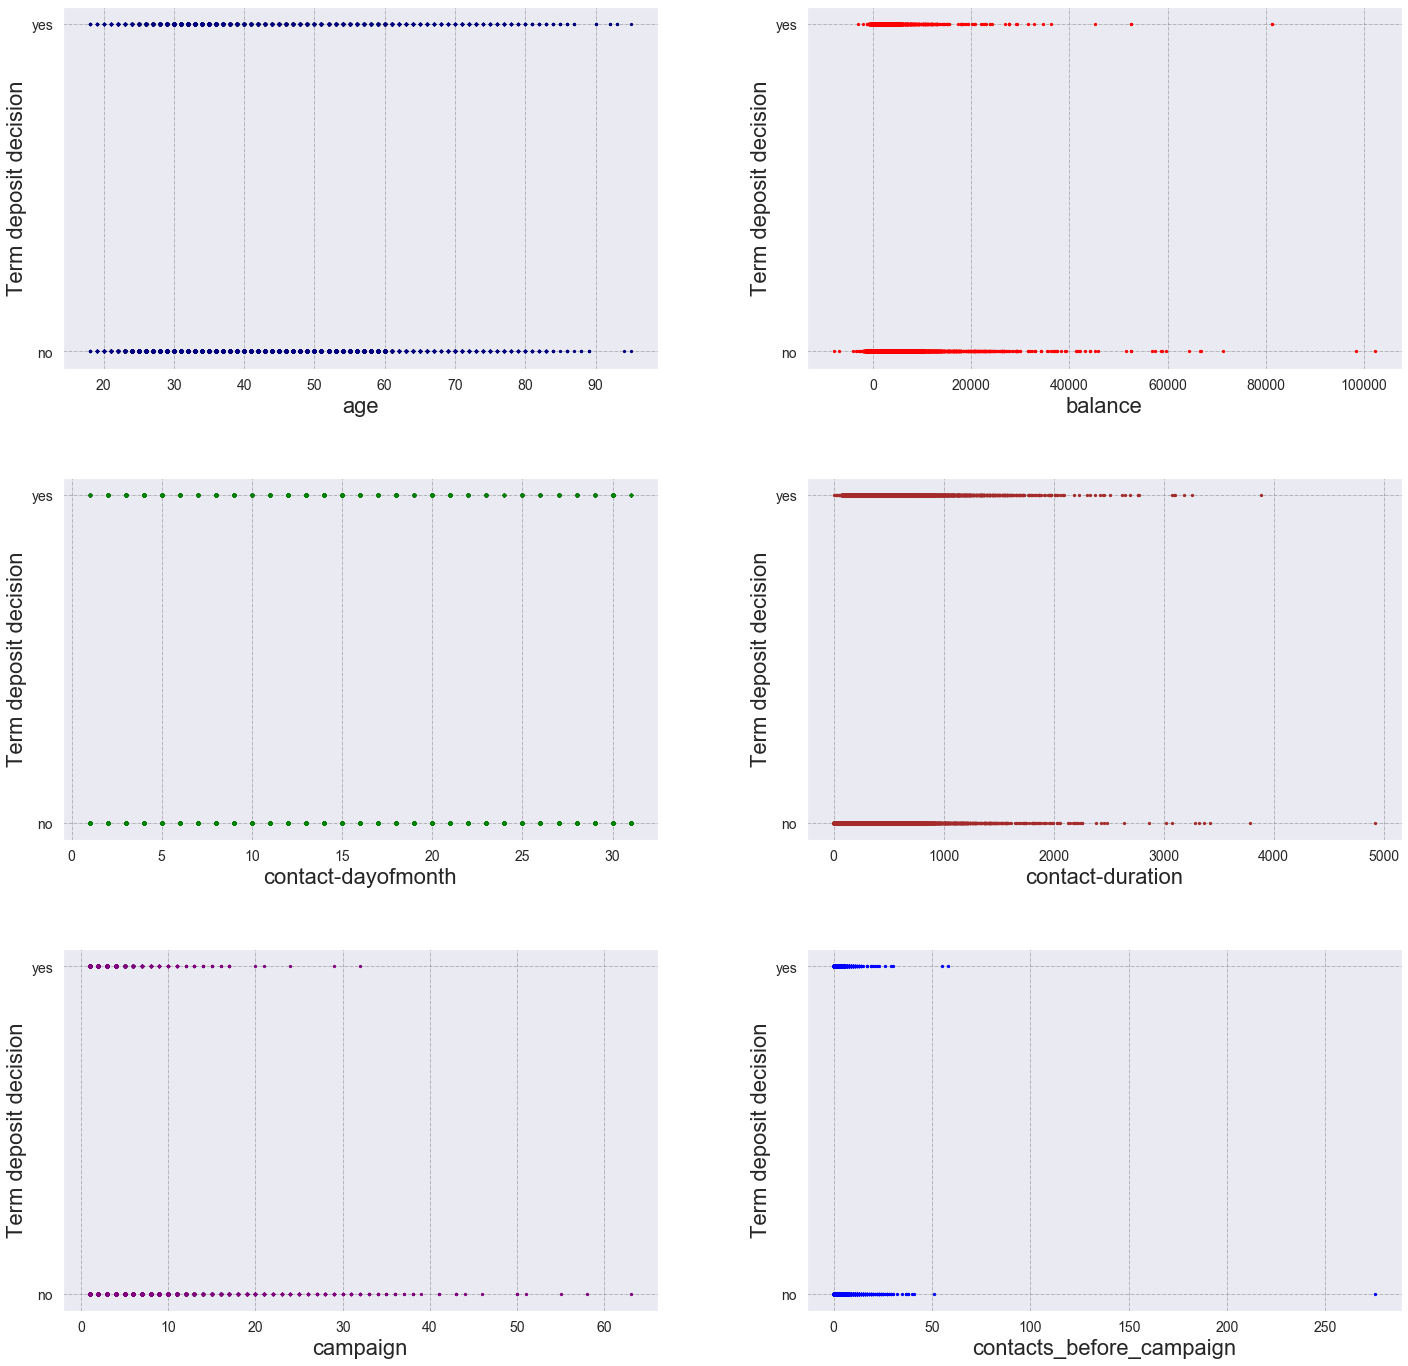

In [120]:
column_names = traindata.select_dtypes(include = 'number').columns
colors = ['navy', 'red', 'green', 'brown', 'purple', 'blue']

fig, ax = plt.subplots(3, 2, figsize=(24, 24))
plt.subplots_adjust(wspace=0.25, hspace=0.3)
plots = [ax[i, j] for i in [0,1,2] for j in [0,1]]

for column, colors, axs in zip(column_names, colors, plots):
    ## 2-D plots array
    axs.scatter(traindata[column], traindata['term_deposit'], c = colors, s = 5)
    axs.set_xlabel(column, fontsize = 22)
    axs.set_ylabel('Term deposit decision', fontsize = 22)
    axs.tick_params(labelsize = 14)
    axs.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    
plt.show()

### There are no clear dependancy between ***any x-axis data*** and `'term-deposit'` values (`'yes'`/`'no'` decision). The `'balance'` and `'age'` columns will be checking more closely, because results from these plots are... suspected. 
### Let's dive in:

In [100]:
traindata.groupby('term_deposit')['balance'].count()

term_deposit
no     39922
yes     5289
Name: balance, dtype: int64

In [101]:
traindata.groupby('term_deposit')['age'].count()

term_deposit
no     39922
yes     5289
Name: age, dtype: int64

### We take a look at the 2 extreme cases:
- ***maximum balance when person did not get term deposit***,
- ***minimum balance when person did get term deposit***.

In [45]:
## First option (looking for max balance value with 'no' decision)
no_decision = traindata[traindata['term_deposit'] == 'no']
no_decision_max_balance = no_decision['balance'].max()


## Second option (looking for min balance value with 'yes' decision)
yes_decision = traindata[traindata['term_deposit'] == 'yes']
yes_decision_min_balance = yes_decision['balance'].min()

### Searching in the table **traindata** above 2 results

In [46]:
traindata[(traindata['balance'] == no_decision_max_balance) | (traindata['balance'] == yes_decision_min_balance)]

,age,job,marital,education,default_credit,balance,housing,loan,contact,contact-dayofmonth,contact-month,contact-duration,campaign,contacts_before_campaign,outcome_previous_campaign,term_deposit
32713,39,self-employed,married,tertiary,no,-3058,yes,yes,cellular,17,apr,882,3,0,unknown,yes
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,0,unknown,no


### Which other things could be the reasons of making ***'yes'***/***'no'*** term deposit decisions by bank?

### From directly comparison 2 rows (indexes) we can get the most important difference which maybe had the biggest impact on final decision. There are:
- 'job',
- 'marital',
- 'housing',
- 'loan',
- 'contact-duration',
- 'campaign'.